### 凱特通道

### import data

In [100]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
import quantstats as qs
import seaborn as sns
import matplotlib.pyplot as py

### import data

In [101]:
yf.pdr_override()
tickers = "0050.TW"
df = pdr.get_data_yahoo(tickers, start="2021-01-01", end="2023-10-31")
df.reset_index(inplace=True)
df['Date'] = df['Date'].dt.strftime('%Y/%m/%d')
df_arr = np.array(df)
time_arr = np.array(df['Date'])

[*********************100%***********************]  1 of 1 completed


In [102]:
#TRt = max((Ht – Lt),abs(Ct-1 – Ht), abs(Ct-1 – Lt))
# 當日高低價之差額
# 前日收盤與當日最高價之差額
# 前日收盤與當日最低價之差額
n = 20
tr_list = []

for t in range(len(df_arr)): 
    if t == 0 :
        tr_list.append(0)
    else:
        tr = max((df_arr[t,2]-df_arr[t,3]),abs(df_arr[t-1,4]-df_arr[t,2]),abs(df_arr[t-1,4]-df_arr[t,3]))
        tr_list.append(tr)

df['TR'] = tr_list
atr = df['TR'].rolling(n).mean()
df['ATR'] = atr

In [110]:
#指標計算
length  = 20
NumStd = 2
NumAtr = 2

df['MA'] = df['Close'].rolling(window=length, center=False).mean()
df['STD'] = df['Close'].rolling(window=length, center=False).std()
df['bb_upline'] = df['MA'] + NumStd*df['STD']
df['bb_downline'] = df['MA'] - NumStd*df['STD']
df['kc_upline'] = df['MA']+ NumAtr*df['ATR']
df['kc_downline'] = df['MA']- NumAtr*df['ATR']
df_arr = np.array(df)
df

,Date,Open,High,Low,Close,Adj Close,Volume,TR,ATR,MA,STD,bb_upLine,bb_downLine,kc_upline,kc_downline,bb_upline,bb_downline
0,2021/01/04,122.199997,124.500000,122.000000,124.349998,114.271156,6140797,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021/01/05,124.199997,124.650002,123.750000,124.599998,114.500877,4731570,0.900002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021/01/06,126.099998,127.150002,124.099998,125.949997,115.741463,10587073,3.050003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/01/07,126.550003,129.000000,126.550003,128.899994,118.452347,6691163,3.050003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/01/08,130.600006,131.250000,129.550003,131.199997,120.565941,12990245,2.350006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2023/10/24,123.800003,123.949997,122.699997,123.949997,123.949997,7197186,1.250000,1.2975,124.3325,1.671611,127.675722,120.989279,126.9275,121.737501,127.675722,120.989279
680,2023/10/25,124.199997,124.900002,124.199997,124.199997,124.199997,3980090,0.950005,1.3075,124.4100,1.624775,127.659551,121.160449,127.0250,121.795000,127.659551,121.160449
681,2023/10/26,121.849998,122.400002,121.599998,121.750000,121.750000,21974122,2.599998,1.3825,124.3200,1.721872,127.763744,120.876256,127.0850,121.555000,127.763744,120.876256
682,2023/10/27,122.150002,122.750000,122.099998,122.300003,122.300003,4068937,1.000000,1.3550,124.3300,1.708831,127.747663,120.912337,127.0400,121.620000,127.747663,120.912337


### Compare Standard Diviation and Average True Range

No handles with labels found to put in legend.


Text(0.5, 1.0, 'STD v.s ATR')

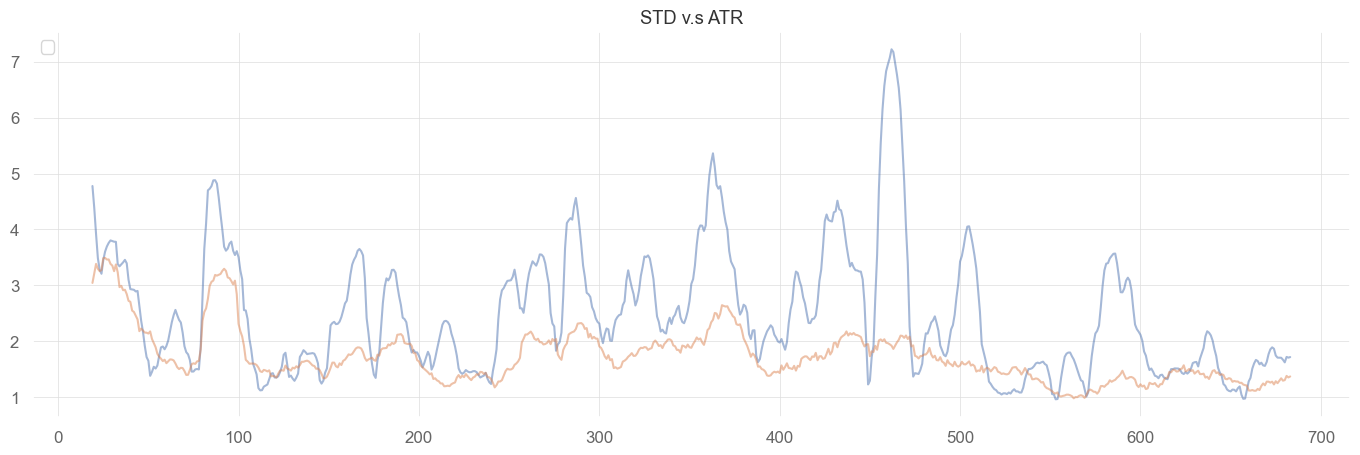

In [104]:
plt.figure(figsize = (17,5))
plt.plot(df['STD'],alpha = 0.5)
plt.plot(df['ATR'],alpha = 0.5)
plt.legend(loc='upper left')
plt.title('STD v.s ATR')

In [109]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,TR,ATR,MA,STD,bb_upLine,bb_downLine,kc_upline,kc_downline
0,2021/01/04,122.199997,124.500000,122.000000,124.349998,114.271156,6140797,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021/01/05,124.199997,124.650002,123.750000,124.599998,114.500877,4731570,0.900002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021/01/06,126.099998,127.150002,124.099998,125.949997,115.741463,10587073,3.050003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/01/07,126.550003,129.000000,126.550003,128.899994,118.452347,6691163,3.050003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/01/08,130.600006,131.250000,129.550003,131.199997,120.565941,12990245,2.350006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2023/10/24,123.800003,123.949997,122.699997,123.949997,123.949997,7197186,1.250000,1.2975,124.3325,1.671611,127.675722,120.989279,126.9275,121.737501
680,2023/10/25,124.199997,124.900002,124.199997,124.199997,124.199997,3980090,0.950005,1.3075,124.4100,1.624775,127.659551,121.160449,127.0250,121.795000
681,2023/10/26,121.849998,122.400002,121.599998,121.750000,121.750000,21974122,2.599998,1.3825,124.3200,1.721872,127.763744,120.876256,127.0850,121.555000
682,2023/10/27,122.150002,122.750000,122.099998,122.300003,122.300003,4068937,1.000000,1.3550,124.3300,1.708831,127.747663,120.912337,127.0400,121.620000


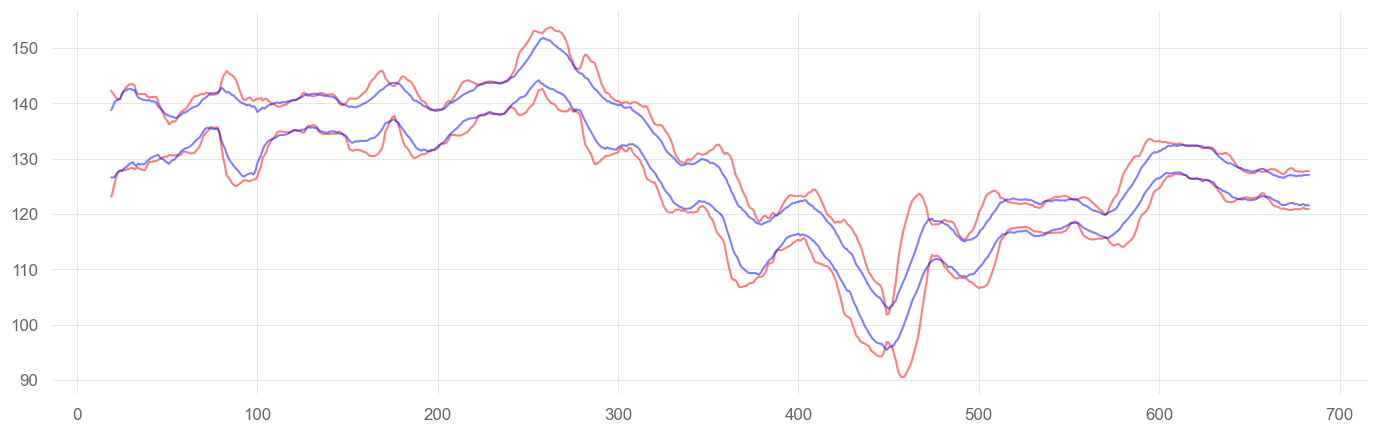

In [117]:
plt.figure(figsize = (17,5))
plt.plot(df['bb_upline'],color = 'red',alpha = 0.5)
plt.plot(df['bb_downline'],color = 'red',alpha = 0.5)
plt.plot(df['kc_upline'],color = 'blue',alpha = 0.5)
plt.plot(df['kc_downline'],color = 'blue',alpha = 0.5)


Enter Long Position
Buy Price: 137.35000610351562, time: 2021/04/08
Sell Price: 138.85000610351562, time: 2021/04/12
Trade completed

Enter Long Position
Buy Price: 138.89999389648438, time: 2021/04/16
Sell Price: 138.85000610351562, time: 2021/04/21
Trade completed

Enter Long Position
Buy Price: 141.1999969482422, time: 2021/04/27
Sell Price: 141.25, time: 2021/04/29
Trade completed

Enter Short Position
Sell Price: 132.89999389648438, time: 2021/05/12
Buycover Price: 128.35000610351562, time: 2021/05/19
Trade completed

Enter Long Position
Buy Price: 139.8000030517578, time: 2021/07/16
Sell Price: 139.8000030517578, time: 2021/07/19
Trade completed

Enter Short Position
Sell Price: 135.85000610351562, time: 2021/07/29
Buycover Price: 135.85000610351562, time: 2021/07/30
Trade completed

Enter Short Position
Sell Price: 132.1999969482422, time: 2021/08/20
Buycover Price: 132.25, time: 2021/08/24
Trade completed

Enter Long Position
Buy Price: 140.14999389648438, time: 2021/09/01
Sell

<AxesSubplot:xlabel='Date'>

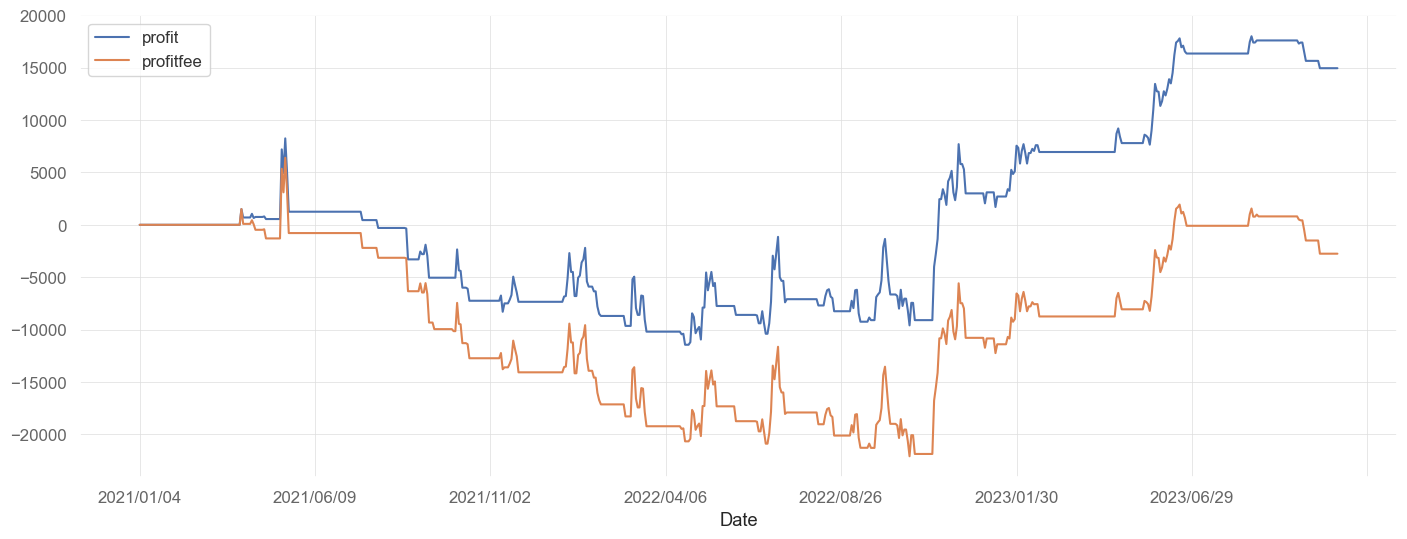

In [105]:
fund = 100000
NumStock = 1000
K=0.1
stockfee_precent =  0.001425 # 證卷手續費
exchangefee_precent = 0.003  # 交易所手續費

BS = None
buy = []
sell = []
sellshort = []
buytocover = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []
rets = []

for i in range(len(df_arr)):

    if i == len(df_arr)-1:
        break

    ## 進場邏輯
    # 當收盤價突破凱特上軌，做多入場
    entryLong = df_arr[i,4] > df_arr[i,13]
    # 當收盤價跌破凱特下軌，做空入場
    entrySellShort = df_arr[i,4] < df_arr[i,14]

    ## 出場邏輯
    # 當收盤價跌破凱特上軌，做多出場
    exitShort = df_arr[i,4] <= df_arr[i,13]
    # 當收盤價突破凱特下軌，做空出場
    exitBuyToCover = df_arr[i,4] >= df_arr[i,14]
    
    ## 停利停損邏輯
    # 做多
    if BS == 'B':
        stopLoss = df_arr[i,4] <= df_arr[t,1] * (1-K)
        stopProfit = df_arr[i,4] >= df_arr[t,1] * (1+K)
    # 做空
    elif BS == 'S':
        stopLoss = df_arr[i,4] >= df_arr[t,1] * (1+K)
        stopProfit = df_arr[i,4] <= df_arr[t,1] * (1-K)

    ##還沒進場不用計算損益
    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)

        if entryLong :
            BS = 'B'
            t = i+1
            buy.append(t)
            print("Enter Long Position")
            print("Buy Price: {}, time: {}".format(df_arr[t,1], time_arr[t]))

        elif entrySellShort:
            BS = 'S'
            t = i+1
            sellshort.append(t)
            print("Enter Short Position")
            print("Sell Price: {}, time: {}".format(df_arr[t,1], time_arr[t]))
    
    #進場開始計算未實現損益
    elif BS == 'B':
        profit = (df_arr[i+1,1] - df_arr[i,1])*NumStock
        profit_list.append(profit)
        
        #近場條件達成，計算未實現損益-交易成本
        if exitShort  or stopLoss or stopProfit:
            pl_round = (df_arr[i+1,1] - df_arr[i,1])*NumStock
            profit_fee = profit - df_arr[i+1,1]*NumStock*(stockfee_precent+exchangefee_precent)
            profit_fee_list.append(profit_fee)
            sell.append(i+1)
            BS=None
            print("Sell Price: {}, time: {}".format(df_arr[i,1], time_arr[i+1]))
            print("Trade completed")
            print()

            # 以實現盈虧
            profit_fee_realized = pl_round - profit_fee
            profit_fee_list_realized.append(profit_fee_realized)
            rets.append(profit_fee_realized/(df_arr[t,1]))

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)

    elif BS == 'S':
        profit = (df_arr[i,1] - df_arr[i+1,1])*NumStock
        profit_list.append(profit)

        #出場條件達成，計算未實現損益-交易成本
        if exitBuyToCover   or stopLoss or stopProfit:
            pl_round = (df_arr[t,1] - df_arr[i+1,1])*NumStock
            profit_fee =  profit - df_arr[i+1,1]*NumStock*stockfee_precent
            profit_fee_list.append(profit_fee)
            buytocover.append(i+1)
            BS = None
            print("Buycover Price: {}, time: {}".format(df_arr[i,1], time_arr[i+1]))
            print("Trade completed")
            print()

            # Realized PnL
            profit_fee_realized = pl_round - profit_fee
            profit_fee_list_realized.append(profit_fee_realized)
            rets.append(profit_fee_realized/(NumStock*df_arr[t,1]))

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)


equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=df['Date'])
# print(equity)

equity.plot(grid=True, figsize=(17,6))

In [106]:
equity['equity'] = equity['profitfee'] + fund
equity['drawdown'] = equity['equity'] - equity['equity'].cummax() #前n個元素的最大值
profit = equity['profitfee'].iloc[-1]
ret = equity['equity'][-1]/equity['equity'][0]-1
mdd = abs(equity['drawdown'].min())
calmarRatio = ret / mdd
tradeTimes = len(buy) + len(sellshort)
winRate = len([i for i in profit_fee_list_realized if i > 0]) / len(profit_fee_list_realized)
profitFactor = sum([i for i in profit_fee_list_realized if i>0]) / abs(sum([i for i in profit_fee_list_realized if i<0]))

print('Profit : ',profit)
print('Return : ',ret)
print('Max DrawDown : ',mdd)
print('Caimar Ratio : ',calmarRatio)
print('Trade Times : ',tradeTimes)
print('Win Rate : ',winRate)
print('Profit Factor : ',profitFactor)

Profit :  -2757.1955587387
Return :  -0.02757195558738701
Max DrawDown :  28493.728968811032
Caimar Ratio :  -9.67649956155862e-07
Trade Times :  52
Win Rate :  0.7884615384615384
Profit Factor :  3.6821888780414964
